## 2. Considere o conjunto de dados sint ́etico dispon ́ıvel em gauss.csv.
### (a) Utilizando o conjunto original, treine 20 modelos de regress ̃ao polinomial com ordens de 1 a 20.
### (b) Para cada ordem, plote o gr ́afico de dispers ̃ao, bem como a curva de regress ̃ao obtida ap ́os o processo de otimiza ̧c ̃ao. (Dica: Use subplots)
### (c) Reporte o RMSE para cada grau do polinˆomio.
### (d) Indique qual grau de polinˆomio mais se adequa aos dados em quest ̃ao.

#### **Nota** : Normalize os dados antes do treinamento e ’desnormalize’ antes de calcular o RMSE.

In [6]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (a) Utilizando o conjunto original, treine 20 modelos de regress ̃ao polinomial com ordens de 1 a 20.

Carregando os dados...

In [2]:
# Carregar o conjunto de dados gauss.csv
data = pd.read_csv('gauss.csv')

# Dividir os dados em atributos (X) e saída (y)
X = data.iloc[:, :-1].values  # Atributos (todas as colunas menos a última)
y = data.iloc[:, -1].values   # Saída (última coluna)


Normalização dos dados...

In [3]:
# Calcular a média e o desvio padrão para cada atributo (coluna)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Normalizar os dados
X_normalized = (X - mean) / std

Treinamento...


In [5]:
# Função para gerar os termos polinomiais
def generate_polynomial_features(X, degree):
    # Inicia com o termo de grau 1 (atributos originais)
    X_poly = X.copy()
    
    # Gera os termos de grau maior
    for d in range(2, degree + 1):
        X_poly = np.column_stack((X_poly, X[:, 0] ** d))
    
    return X_poly

# Lista para armazenar os RMSE de cada grau
rmse_values = []

# Loop para treinar modelos de grau 1 a 20
for degree in range(1, 21):
    # Gerar os termos polinomiais para os dados normalizados
    X_poly = generate_polynomial_features(X_normalized, degree)
    
    # Calcular os coeficientes da regressão polinomial (usando a fórmula normal)
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    # Previsões para os dados normalizados
    y_pred = X_poly @ w
    
    # Calcular o RMSE
    rmse_val = np.sqrt(np.mean((y - y_pred) ** 2))
    rmse_values.append(rmse_val)
    
    # (Opcional) Imprimir o RMSE para cada grau
    print(f"Grau {degree}: RMSE = {rmse_val:.4f}")

Grau 1: RMSE = 68.5773
Grau 2: RMSE = 60.4174
Grau 3: RMSE = 60.3906
Grau 4: RMSE = 58.2166
Grau 5: RMSE = 58.2145
Grau 6: RMSE = 55.4679
Grau 7: RMSE = 55.4652
Grau 8: RMSE = 51.7544
Grau 9: RMSE = 51.7478
Grau 10: RMSE = 47.4937
Grau 11: RMSE = 47.4829
Grau 12: RMSE = 43.2239
Grau 13: RMSE = 43.1967
Grau 14: RMSE = 39.3495
Grau 15: RMSE = 39.3245
Grau 16: RMSE = 36.1261
Grau 17: RMSE = 36.1096
Grau 18: RMSE = 33.6349
Grau 19: RMSE = 33.6241
Grau 20: RMSE = 31.7062


### (b) Para cada ordem, plote o gr ́afico de dispers ̃ao, bem como a curva de regress ̃ao obtida ap ́os o processo de otimiza ̧c ̃ao. (Dica: Use subplots)

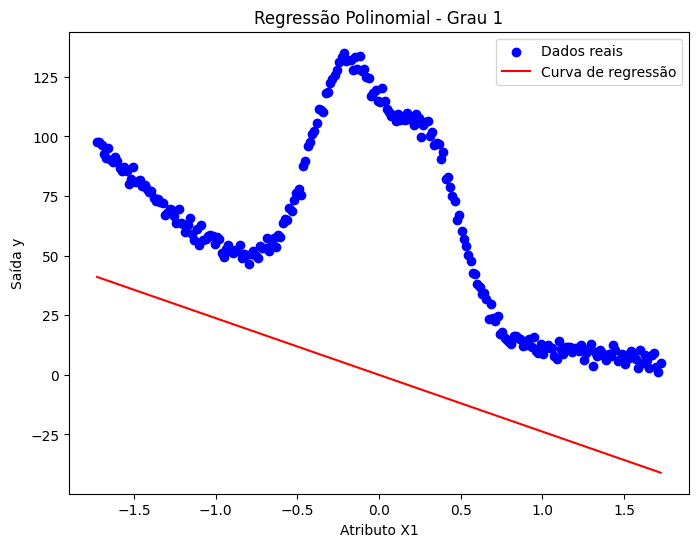

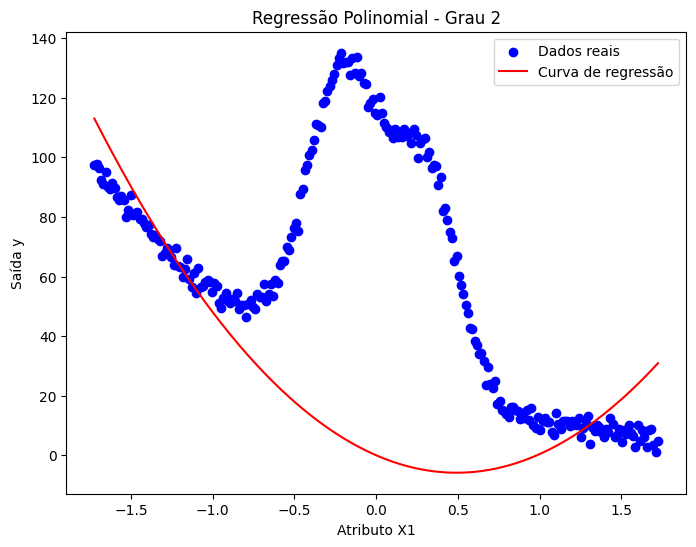

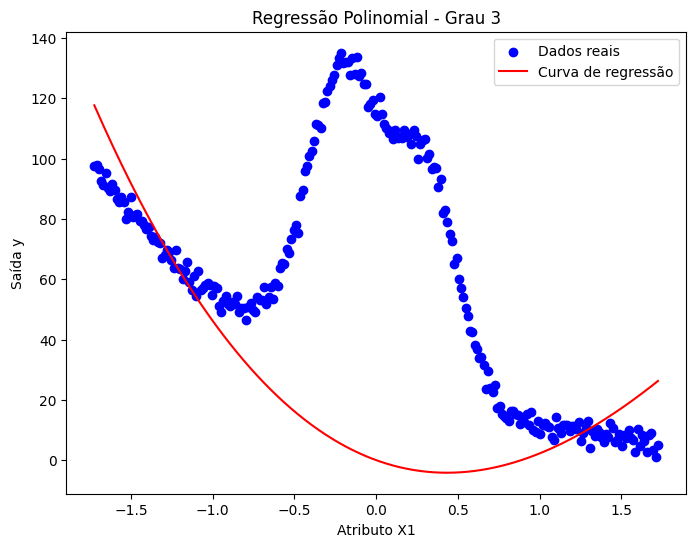

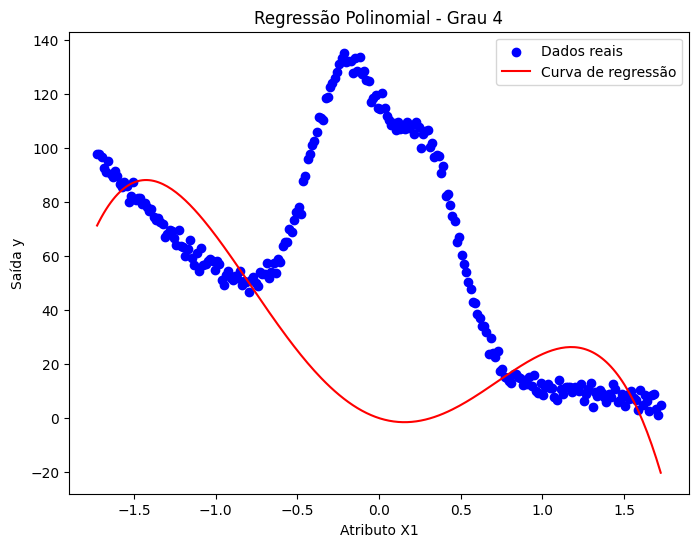

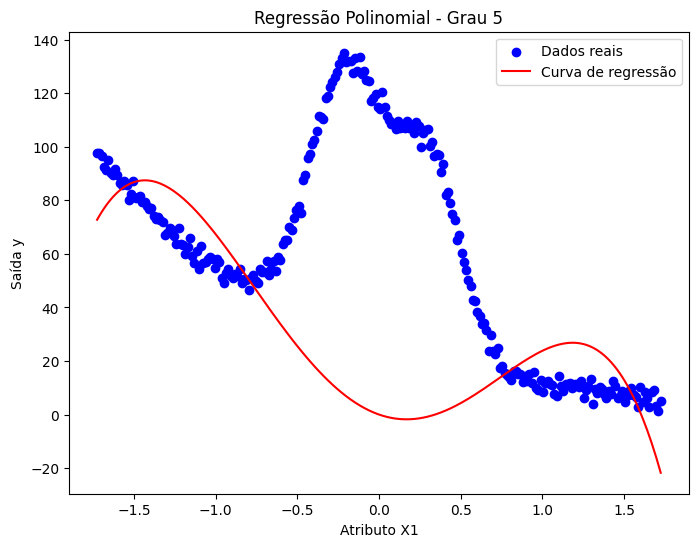

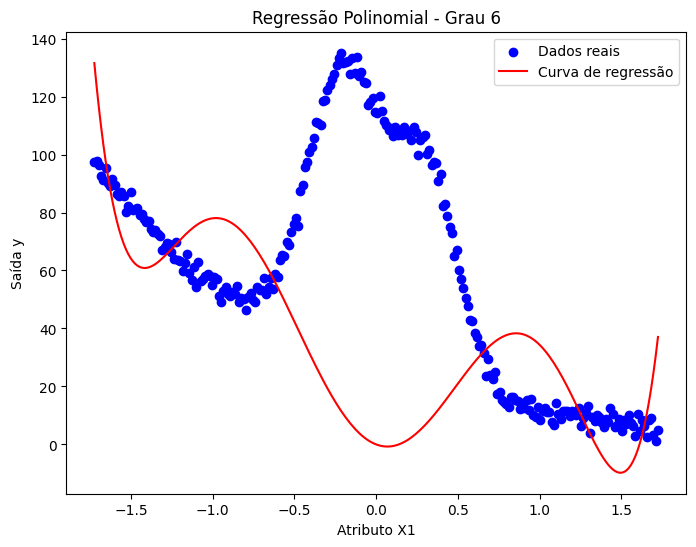

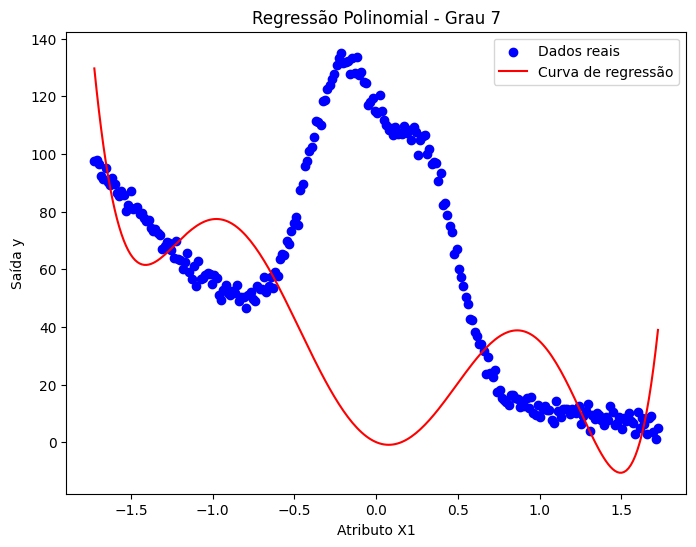

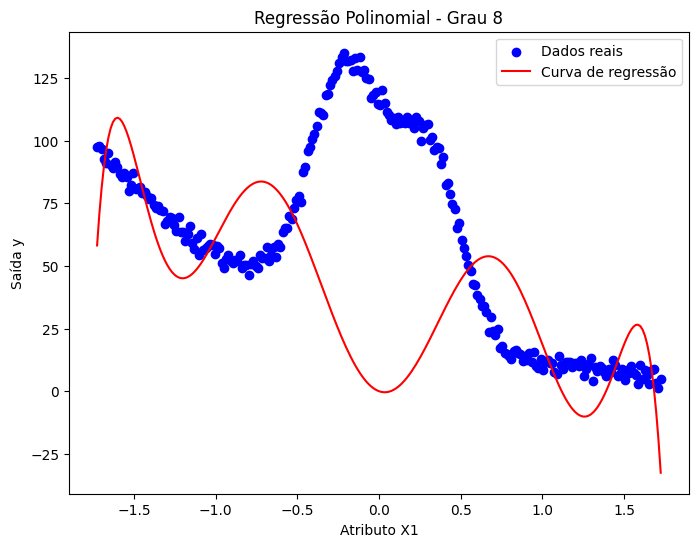

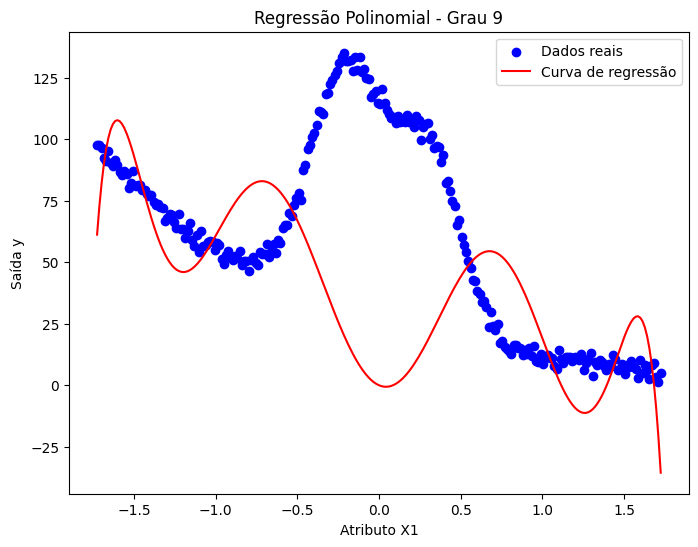

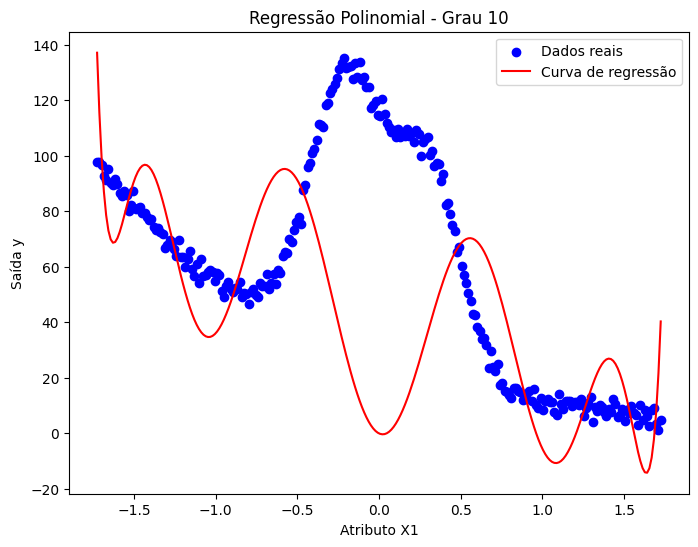

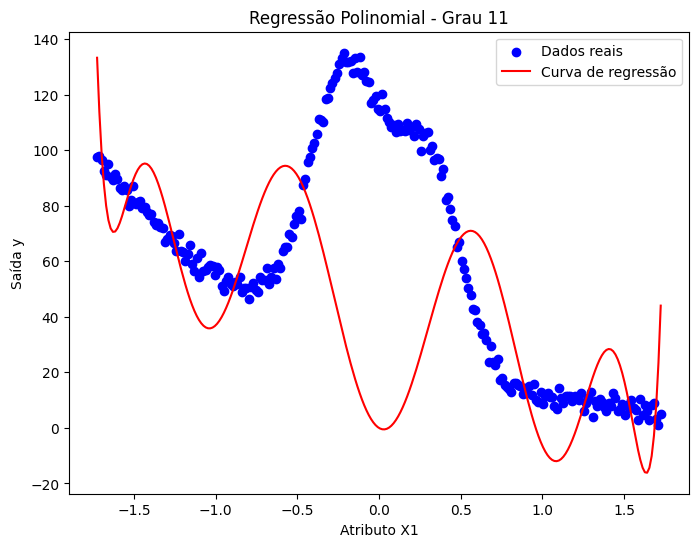

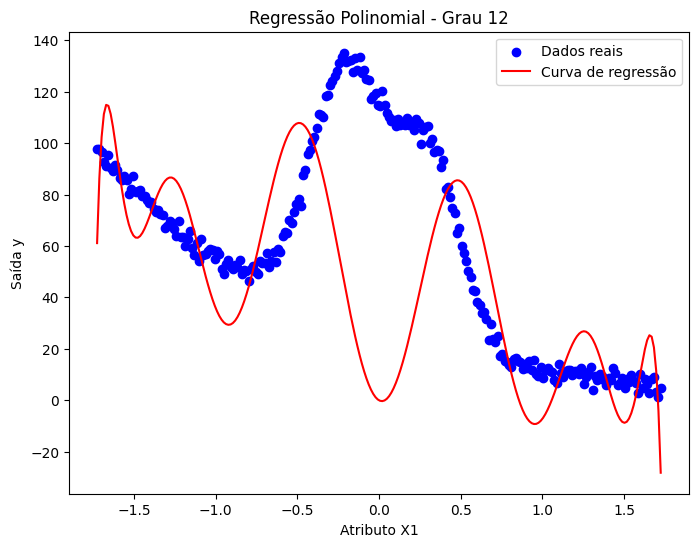

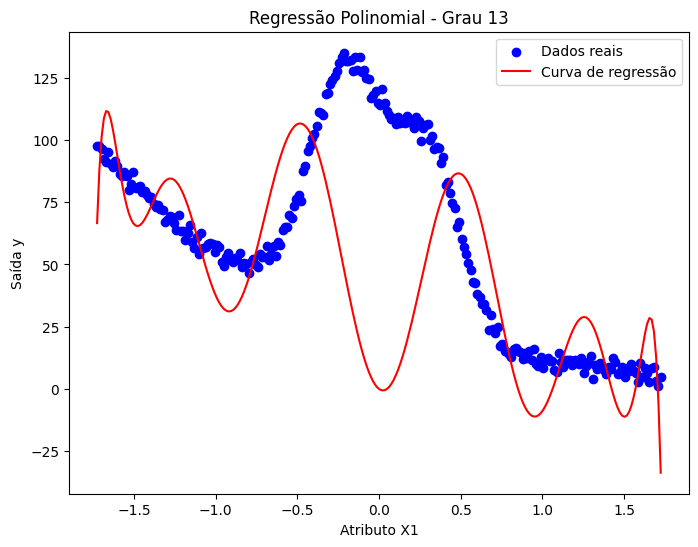

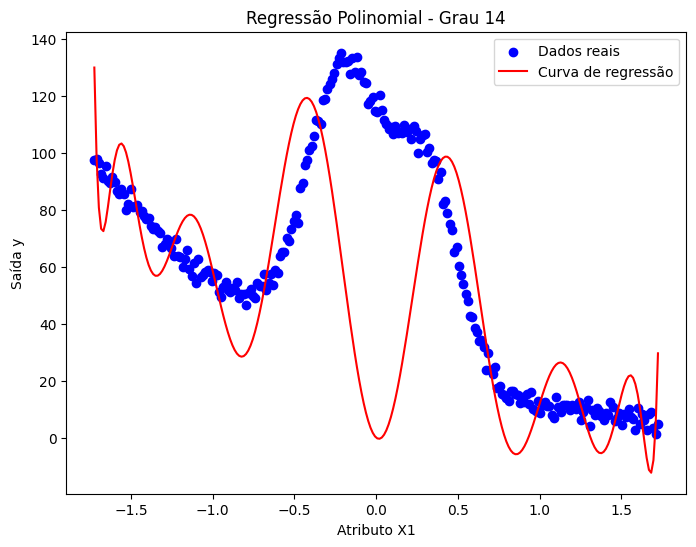

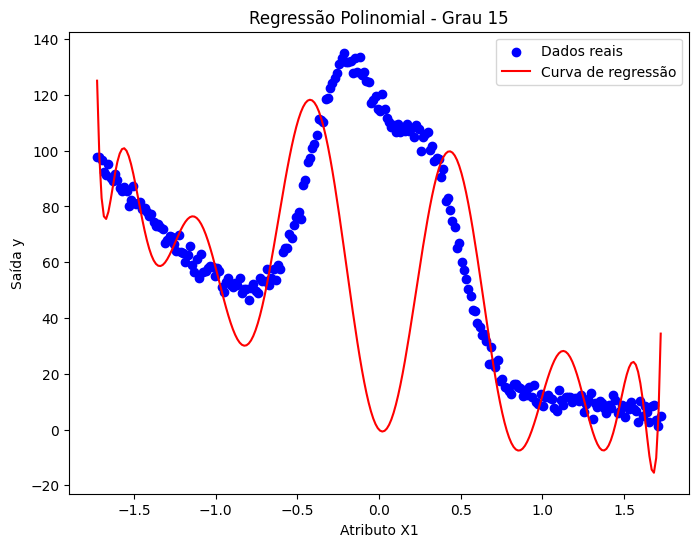

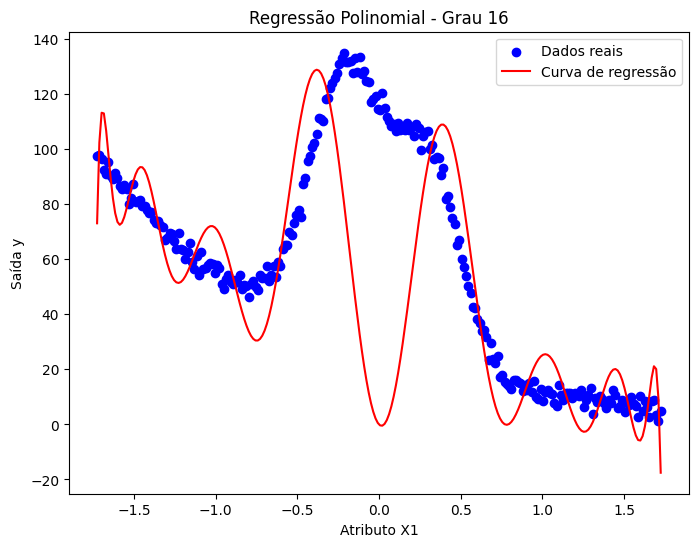

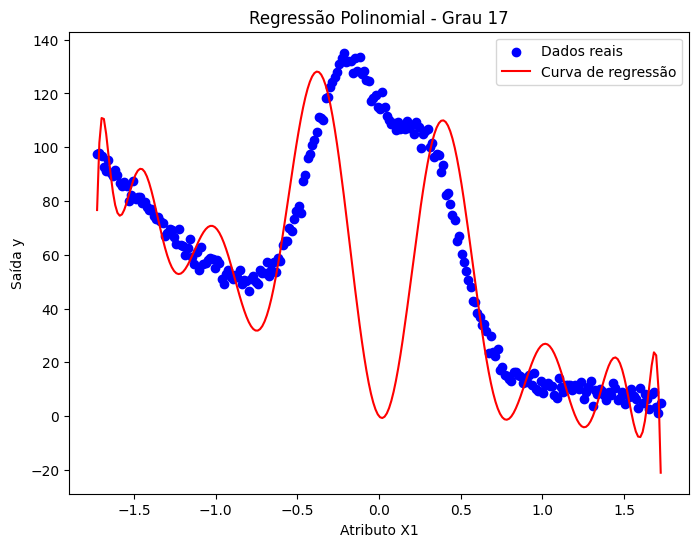

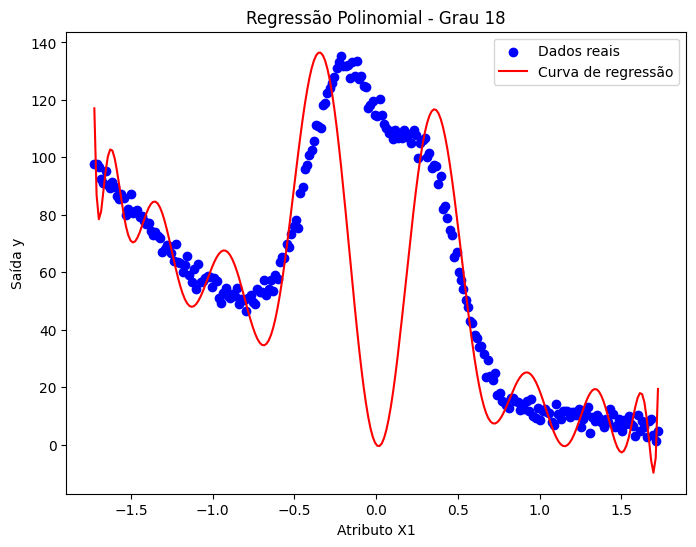

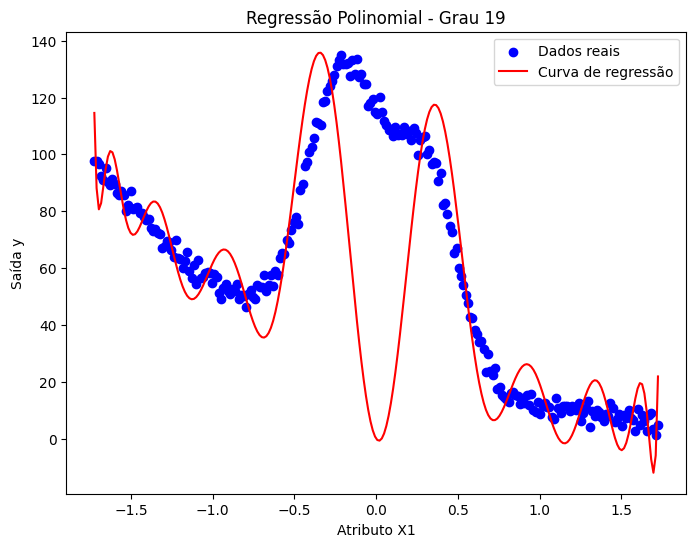

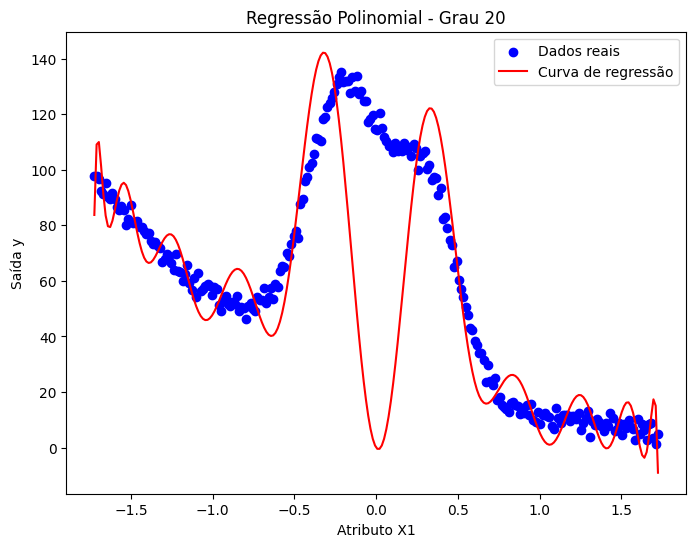

In [8]:

# Loop para criar um gráfico para cada grau de polinômio
for degree in range(1, 21):
    # Gerar os termos polinomiais para os dados normalizados
    X_poly = generate_polynomial_features(X_normalized, degree)
    
    # Calcular os coeficientes da regressão polinomial
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    # Previsões para os dados normalizados
    y_pred = X_poly @ w
    
    # Criar um novo gráfico
    plt.figure(figsize=(8, 6))
    
    # Gráfico de dispersão (dados reais)
    plt.scatter(X_normalized[:, 0], y, color='blue', label='Dados reais')
    
    # Gráfico da curva de regressão (modelo ajustado)
    sorted_idx = np.argsort(X_normalized[:, 0])  # Ordenar os dados para a linha de regressão
    plt.plot(X_normalized[sorted_idx, 0], y_pred[sorted_idx], color='red', label='Curva de regressão')
    
    # Títulos e legendas
    plt.title(f'Regressão Polinomial - Grau {degree}')
    plt.xlabel('Atributo X1')
    plt.ylabel('Saída y')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

### (c) Reporte o RMSE para cada grau do polinˆomio.

In [9]:
# Lista para armazenar os RMSE de cada grau
rmse_values = []

# Loop para calcular o RMSE para cada grau de polinômio
for degree in range(1, 21):
    # Gerar os termos polinomiais para os dados normalizados
    X_poly = generate_polynomial_features(X_normalized, degree)
    
    # Calcular os coeficientes da regressão polinomial
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    # Previsões para os dados normalizados
    y_pred = X_poly @ w
    
    # Calcular o RMSE
    rmse_val = np.sqrt(np.mean((y - y_pred) ** 2))
    rmse_values.append(rmse_val)
    
    # Imprimir o RMSE para o grau atual
    print(f"Grau {degree}: RMSE = {rmse_val:.4f}")

Grau 1: RMSE = 68.5773
Grau 2: RMSE = 60.4174
Grau 3: RMSE = 60.3906
Grau 4: RMSE = 58.2166
Grau 5: RMSE = 58.2145
Grau 6: RMSE = 55.4679
Grau 7: RMSE = 55.4652
Grau 8: RMSE = 51.7544
Grau 9: RMSE = 51.7478
Grau 10: RMSE = 47.4937
Grau 11: RMSE = 47.4829
Grau 12: RMSE = 43.2239
Grau 13: RMSE = 43.1967
Grau 14: RMSE = 39.3495
Grau 15: RMSE = 39.3245
Grau 16: RMSE = 36.1261
Grau 17: RMSE = 36.1096
Grau 18: RMSE = 33.6349
Grau 19: RMSE = 33.6241
Grau 20: RMSE = 31.7062


### (d) Indique qual grau de polinˆomio mais se adequa aos dados em quest ̃ao.

Visualmente parece ser o 20...